# Web 3: Scraping Web Data

In [1]:
# import statements
import requests
from bs4 import BeautifulSoup # bs4 is the module, BeautifulSoup is the type

### Warmup 1: HTML table and hyperlinks
In order to scrape web pages, you need to know the HTML syntax for tables and hyperlinks.

TODO: Add another row or two to the table below

<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td><a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences</a></td>
    </tr>
</table>

### Warmup 2: Scraping data from syllabus page
URL: https://cs220.cs.wisc.edu/f23/syllabus.html

In [2]:
# Get this page using requests.  
url = "https://cs220.cs.wisc.edu/f23/syllabus.html"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# split the contents into list of strings using newline separator
content_list = contents.split("\n")

#### Warmup 2a: Find all sentences that contain "CS220"

In [3]:
cs220_sentences = [sentence for sentence in content_list if "CS220" in sentence]

#### Warmup 2b: Extract title tag's value

In [4]:
title_tag = cs220_sentences[0]
print(title_tag)
title_tag = title_tag.strip()
print(title_tag)
title_tag_parts = title_tag.split(">")
print(title_tag_parts)
title_details = title_tag_parts[1]
title_detail_parts = title_details.split("<")
title_detail_parts[0] # finally, we are able to extract the title tag's data
# Takeaway:  It would be nice if there were a module that could make finding easy!

    <title>CS220</title>
<title>CS220</title>
['<title', 'CS220</title', '']


'CS220'

### Learning Objectives:

- Using the Document Object Model of web pages
    - describe the 3 things a DOM element may contain, and give examples of each
    - given an html string, identify the correct DOM tree of elements
- Create BeautifulSoup objects from an html string and use prettify to display
- Use the BeautifulSoup methods 'find' and 'find_all' to find particular elements by their tag
- Inspect a BeautufulSoup element to determine the contents of a web page using get_text(), children, and attrs
- Use BeautifulSoup to scrape a live web site. 

### Document Object Model

In order to render a HTML page, most web browsers use a tree structure called Document Object Model (DOM) to represent the HTML page as a hierarchy of elements.

<div>
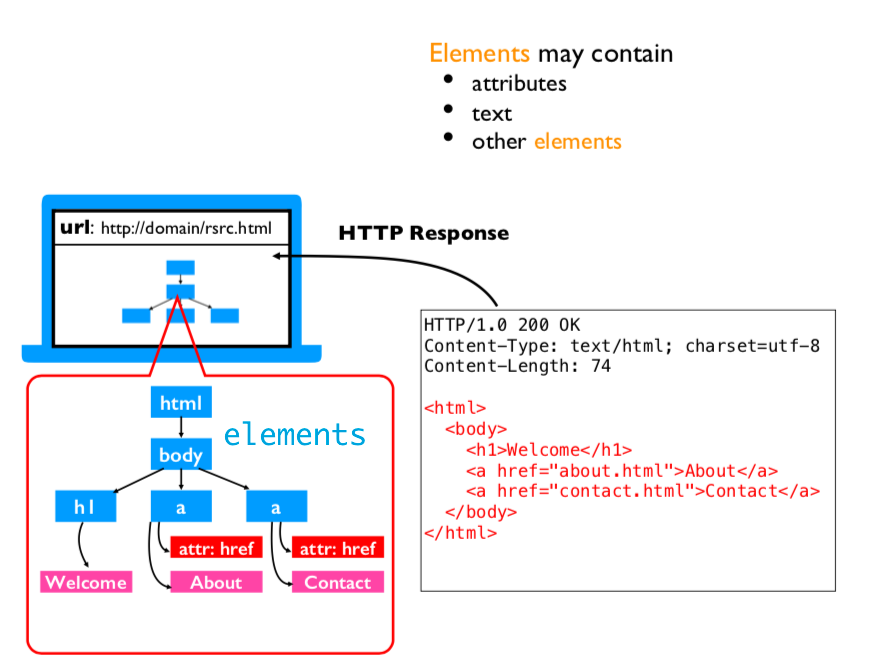
</div>

### Take a look at the HTML in the below cell.

<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li>Sleep <b>More</b></li>
    <li>Exercise</li>
</ul>

### BeautifulSoup constructor
- takes a html, as a string, as argument  and parses it
- Syntax: `BeautifulSoup(<html_string>, "html.parser")`
- Second argument specifies what kind of parsing we want done

New syntax, you can use `"""some really long string"""` to split a string across multiple lines.

In [5]:
html_string = """
<b>To Do List</b>
<ul>
    <li>Eat Healthy</li>
    <li>Sleep <b>More</b></li>
    <li>Exercise</li>
</ul>
"""
bs_obj = BeautifulSoup(html_string, "html.parser") 

type(bs_obj)

bs4.BeautifulSoup

## BeautifulSoup operations
- `prettify()`        returns a formatted representation of the raw HTML

### A  BeautifulSoup object can be searched for elements using:
- `find("")`         returns the first element matching the tag string, None otherwise
- `find_all("")`     returns an iterable of all matching elements (HTML 'tags'), empty iterable otherwise

### Beautiful Soup Elements can be inspected by using:
- `get_text()`     returns the text associated with this element, if applicable; does not return the child elements associated with that element
- `.children`      all children of this element (can be converted into a list)
- `.attrs`          the atribute associated with that element / tag.

`prettify()` returns a formatted representation of the raw HTML

In [6]:
print(bs_obj.prettify())

<b>
 To Do List
</b>
<ul>
 <li>
  Eat Healthy
 </li>
 <li>
  Sleep
  <b>
   More
  </b>
 </li>
 <li>
  Exercise
 </li>
</ul>



`find` returns the first HTML 'tag' matching the string "b"

In [7]:
element = bs_obj.find("b") 

What is the type of find's return value?

In [8]:
print(type(element))

<class 'bs4.element.Tag'>


How do we extract the text of the "b" element and what is its type?

In [9]:
text = element.get_text()
print(text, type(text))

To Do List <class 'str'>


`find` returns None if it cannot find that element.

In [10]:
# assert that this html string has a <ul> tag
assert bs_obj.find("ul") != None 

# assert that this does not have an <a> tag
assert bs_obj.find("a") == None

`find_all` returns an iterable of all matching elements (HTML 'tags') matching the string "b"

In [11]:
element_list = bs_obj.find_all("b")
element_list

[<b>To Do List</b>, <b>More</b>]

What is the type of return value of `find_all`?

In [12]:
type(element_list)

bs4.element.ResultSet

In [13]:
type(element_list[0])

bs4.element.Tag

Use a for loop to print the text of each "b" element.

In [14]:
for element in element_list:
    print(element.get_text())

To Do List
More


Unlike `find`, `find_all` returns an empty iterable, when there are no matching elements.

In [15]:
# only searches for elements, not text
print(bs_obj.find_all("Sleep"))  
# if not present returns None
print(bs_obj.find("Sleep"))      

[]
None


You can invoke `find` or `find_all` on other BeautifulSoup object instances.

Find all `li` elements and find `b` element inside the second `li` element.

In [16]:
li_elements = bs_obj.find_all("li")
second_li = li_elements[1]
second_li.find("b")

<b>More</b>

DOM trees are hierarchical. You can use `.children` on any element to gets its children.

Find all the children of "ul" element.

In [17]:
element = bs_obj.find("ul")
children_list = list(element.children)
children_list

['\n',
 <li>Eat Healthy</li>,
 '\n',
 <li>Sleep <b>More</b></li>,
 '\n',
 <li>Exercise</li>,
 '\n']

Find text of every child element.

In [18]:
for child in children_list:
    print(child.get_text())



Eat Healthy


Sleep More


Exercise




Notice that `get_text()` only returns the actual text and not the HTML formatting. For example, part of second child element's text is enclosed within `<b>More</b>`. Despite that `get_text()`

To understand `attribute`, let's go back to the table from warmup 1.

In [19]:
html_string = """
<table>
  <tr>
    <th>University</th>
    <th>Department</th>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://www.cs.wisc.edu/">Computer Sciences</a></td>
  </tr>
  <tr>
    <td>UW-Madison</td>
    <td><a href = "https://stat.wisc.edu/">Statistics</a></td>
  </tr>
   <tr>
    <td>UW-Madison</td>
    <td><a href = "https://cdis.wisc.edu/">CDIS</a></td>
  </tr>
  <tr>
    <td>UC Berkeley</td>
    <td>
    <a href = "https://eecs.berkeley.edu/">Electrical Engineering and Computer Sciences
    </a>
    </td>
    </tr>
</table>
"""

Find the table headers.

In [20]:
bs_obj = BeautifulSoup(html_string, "html.parser")
th_elements = bs_obj.find_all("th") # works only if there is one table in that whole HTML

for th in th_elements:
    print(th.get_text())

University
Department


Find the first anchor element, extract its text.

In [21]:
anchor = bs_obj.find("a")
print(anchor.get_text())

Computer Sciences


You can get the attributes associated with an element using `.attrs` on that element object. Return value will be a `dict` mapping each attribute to its value.

Now, let's get the attributes of the anchor element.

In [22]:
anchor_attributes = anchor.attrs
anchor_attributes

{'href': 'https://www.cs.wisc.edu/'}

What is the return value type of `.attrs`?

In [23]:
print(type(anchor_attributes))

<class 'dict'>


Extract the hyperlink.

In [24]:
anchor_attributes["href"]

'https://www.cs.wisc.edu/'

Extract hyperlinks for each department and populate department name and link into a `dict`.

In [25]:
department_urls = {} # Key: department name; Value: website URL
tr_elements = bs_obj.find_all("tr")

for tr in tr_elements:
    if tr.find("td") != None: # this should handle row containing th's
        anchor = tr.find("a")
        name = anchor.get_text()
        website = anchor.attrs["href"]
        department_urls[name] = website
        
department_urls

{'Computer Sciences': 'https://www.cs.wisc.edu/',
 'Statistics': 'https://stat.wisc.edu/',
 'CDIS': 'https://cdis.wisc.edu/',
 'Electrical Engineering and Computer Sciences\n    ': 'https://eecs.berkeley.edu/'}

#### Self-practice: Extract title of the CS220 syllabus page (from warmup 2)

In [26]:
# Get this page using requests.  
url = "https://cs220.cs.wisc.edu/f23/syllabus.html"
r = requests.get(url)

# make sure there is no error
r.raise_for_status()

# read the entire contents of the page into a single string variable
contents = r.text

# split the contents into list of strings using newline separator
bs_obj = BeautifulSoup(contents, "html.parser")
bs_obj.find("title").get_text()

'CS220'

## Parsing small_movies html table to extract `small_movies.json`

### Step 1: Read `small_movies.html` content into a variable

In [27]:
f = open("small_movies.html")
small_movies_str = f.read()
f.close()
# small_movies_str

### Step 2: Initialize BeautifulSoup object instance

In [28]:
bs_obj = BeautifulSoup(small_movies_str, "html.parser")

### Step 3: Find table element

In [29]:
table = bs_obj.find("table") # works only when you have exactly 1 table

### Step 4: Find all th tags, to parse the table header

In [30]:
header = [th.get_text() for th in table.find_all('th')]
header

['Title', 'Genre', 'Director', 'Cast', 'Year', 'Runtime', 'Rating', 'Revenue']

### Step 5: Scrape second row, convert data to appropriate types, and populate data into a row dictionary
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

In [31]:
def format_revenue(revenue):
    if type(revenue) == float: # need this in here if we run code multiple times
        return revenue
    elif revenue[-1] == 'M': # some have an "M" at the end
        return float(revenue[:-1]) * 1e6
    else:                    # otherwise, assume millions.
        return float(revenue) * 1e6

In [32]:
# Why second row? Because first row has the header information.

movie = {}

tr_elements = table.find_all('tr')
tr = tr_elements[1]
td_elements = tr.find_all('td')
for idx in range(len(td_elements)):
    td = td_elements[idx]
    val = td.get_text()
    if header[idx] in ["Year", "Runtime"]:
        movie[header[idx]] = int(val)
    elif header[idx] == "Revenue":
        revenue = format_revenue(val)
        movie[header[idx]] = revenue
    elif header[idx] == "Rating":
        movie[header[idx]] = float(val)
    else:
        movie[header[idx]] = val
    
movie

{'Title': 'Guardians of the Galaxy',
 'Genre': 'Action,Adventure,Sci-Fi',
 'Director': 'James Gunn',
 'Cast': 'Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana',
 'Year': 2014,
 'Runtime': 121,
 'Rating': 8.1,
 'Revenue': 333130000.0}

### Step 6: Scrape all rows, convert data to appropriate types, and populate data into a row dictionary and append row dictionaries into a list
- "Year", "Runtime": `int` conversion
- "Revenue": format_revenue(...) conversion
- "Rating": `float` conversion

You can compare your parsing output to `small_movies.json` file contents, to confirm your result.

In [33]:
movies_data = []

tr_elements = table.find_all('tr')
for tr in tr_elements[1:]: # Skip first row (header row)
    movie = {}
    td_elements = tr.find_all('td')
    for idx in range(len(td_elements)):
        td = td_elements[idx]
        val = td.get_text()
        if header[idx] in ["Year", "Runtime"]:
            movie[header[idx]] = int(val)
        elif header[idx] == "Revenue":
            revenue = format_revenue(val)
            movie[header[idx]] = revenue
        elif header[idx] == "Rating":
            movie[header[idx]] = float(val)
        else:
            movie[header[idx]] = val
    movies_data.append(movie)
movies_data

[{'Title': 'Guardians of the Galaxy',
  'Genre': 'Action,Adventure,Sci-Fi',
  'Director': 'James Gunn',
  'Cast': 'Chris Pratt, Vin Diesel, Bradley Cooper, Zoe Saldana',
  'Year': 2014,
  'Runtime': 121,
  'Rating': 8.1,
  'Revenue': 333130000.0},
 {'Title': 'Prometheus',
  'Genre': 'Adventure,Mystery,Sci-Fi',
  'Director': 'Ridley Scott',
  'Cast': 'Noomi Rapace, Logan Marshall-Green, Michael         fassbender, Charlize Theron',
  'Year': 2012,
  'Runtime': 124,
  'Rating': 7.0,
  'Revenue': 126460000.0},
 {'Title': 'Split',
  'Genre': 'Horror,Thriller',
  'Director': 'M. Night Shyamalan',
  'Cast': 'James McAvoy, Anya Taylor-Joy, Haley Lu Richardson, Jessica Sula',
  'Year': 2016,
  'Runtime': 117,
  'Rating': 7.3,
  'Revenue': 138120000.0},
 {'Title': 'Sing',
  'Genre': 'Animation,Comedy,Family',
  'Director': 'Christophe Lourdelet',
  'Cast': 'Matthew McConaughey,Reese Witherspoon, Seth MacFarlane, Scarlett Johansson',
  'Year': 2016,
  'Runtime': 108,
  'Rating': 7.2,
  'Revenue'

### Final step: convert steps 1 through 6 into a function and use that function to parse `full_movies.html` file.

In [34]:
def parse_html(html_file):
    f = open(html_file)
    small_movies_str = f.read()
    f.close()

    bs_obj = BeautifulSoup(small_movies_str, "html.parser")
    
    table = bs_obj.find("table") # works only when you have exactly 1 table
    header = [th.get_text() for th in table.find_all('th')]

    movies_data = []

    tr_elements = table.find_all('tr')
    for tr in tr_elements[1:]: # Skip first row (header row)
        movie = {}
        td_elements = tr.find_all('td')
        for idx in range(len(td_elements)):
            td = td_elements[idx]
            val = td.get_text()
            if header[idx] in ["Year", "Runtime"]:
                movie[header[idx]] = int(val)
            elif header[idx] == "Revenue":
                revenue = format_revenue(val)
                movie[header[idx]] = revenue
            elif header[idx] == "Rating":
                movie[header[idx]] = float(val)
            else:
                movie[header[idx]] = val
        movies_data.append(movie)
    
    return movies_data

In [35]:
full_movies_data = parse_html("full_movies.html")
# full_movies_data